*args y **kwargs

In [2]:
def funcion_args(*args):
    print(args)
    print(type(args))
    for i in args:
        print(i)


variable1 = 1994
variable2 = 'Jorge'

funcion_args(variable1, variable2)

(1994, 'Jorge')
<class 'tuple'>
1994
Jorge


In [3]:
def funcion_kwargs(**kwargs):
    print(kwargs)
    print(type(kwargs))
    for k, v in kwargs.items():
        print(k, v)


variable1 = 1994
variable2 = 'Jorge'

funcion_kwargs(variable_1 = variable1, variable_2 = variable2)

{'variable_1': 1994, 'variable_2': 'Jorge'}
<class 'dict'>
variable_1 1994
variable_2 Jorge


Escribe una función llamada `suma_elementos` que acepte un número variable de argumentos posicionales y devuelva la suma de todos los elementos.


In [4]:
def suma_elementos(*args):
    return sum(args)

In [5]:
suma_elementos(1,2,3)

6

Crea una función llamada `concatenar_strings` que tome varios argumentos y los concatene en una sola cadena, separados por un espacio en blanco, utilizando `*args`.


In [6]:
def concatenar_string(*args):
    return ' '.join(args)

In [7]:
concatenar_string('Hola','Mundo','!')

'Hola Mundo !'

Escribe una función llamada `saludo_personalizado` que acepte varios argumentos clave y valor, utilizando `**kwargs`, y que imprima un saludo personalizado con el nombre y la edad proporcionados. Fuerza con un if-else, que intruduzcan las claves `edad` y `nombre`

In [8]:
def saludo_personalizado(**kwargs):
    
    if 'nombre' in kwargs and 'edad' in kwargs:
        nombre= kwargs['nombre']
        edad= kwargs['edad']
        print(f'Hola jueputa {nombre}, tienes {edad} funking años')
    
    else: 
        print('Te confundiste de argumentos wey')


In [9]:
saludo_personalizado(nombre='Alejandro',edad=30)

Hola jueputa Alejandro, tienes 30 funking años


Crea una función llamada `crear_diccionario` que tome un número variable de argumentos clave y valor y devuelva un diccionario que contenga estos pares clave-valor.


In [10]:
def crear_diccionario(**kwargs):
    dicto={}
    dicto.update(kwargs)
    return dicto

In [11]:
crear_diccionario(nombre='Alejandro',edad=30,estudios='Pharmacy',transporte='Pubico')

{'nombre': 'Alejandro',
 'edad': 30,
 'estudios': 'Pharmacy',
 'transporte': 'Pubico'}

In [12]:
from warnings import filterwarnings
filterwarnings("ignore")

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, silhouette_samples




Lea el dataset `bank_marketing`, efectúe un EDA sobre el mismo y luego segmente los clientes.

Pistas:
+ Estructura similar a supervisado, vamos a hacer un EDA, preprocesamos, sacamos modelos, sacamos conclusiones y volvemos a iterar al principio.
+ La última columna es variable TARGET en algunos casos de uso, sería interesante, por ejemplo, segmentar a los clientes y ver que grupo es más parecido a los que están suscritos.
+ Se deben preprocesar los datos en el caso de que se usen modelos basado en distancias.
+ Nótese que cuantas más variables se introducen en un modelo no supervisado, menos explicativo se vuelve el grupo resultante, es nuestra labor nombrar o etiquetar a cada grupo.
+ Se deben utilizar tanto ElbowPlot como SillhouettePlot

In [14]:
df=pd.read_csv('bank_marketing_dataset.csv',sep=',')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [18]:
df.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [23]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

print(df.duplicated().sum())

# eliminamos duplicados.

12
0


In [34]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [25]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object

In [ ]:
# tenemos que hacer un preprocesamiento. normalizacion y onehotenconding.

In [ ]:
from kmodes.kprototypes import KPrototypes

# Suponiendo que `df` es tu DataFrame con variables categóricas y numéricas
# `categorical_columns` es una lista de nombres de columnas categóricas
# `numeric_columns` es una lista de nombres de columnas numéricas

# Instanciar el modelo K-Prototypes
kproto = KPrototypes(n_clusters=5, init='Cao')

# Ajustar el modelo a los datos
clusters = kproto.fit_predict(df.values, categorical=[df.columns.get_loc(col) for col in categorical_columns])

# Agregar las etiquetas de cluster al DataFrame original
df['cluster'] = clusters


In [24]:
df.corr()

ValueError: could not convert string to float: 'housemaid'

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

other attributes:

11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

13 - previous: number of contacts performed before this campaign and for this client (numeric)

14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


social and economic context attributes:

15 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

16 - cons.price.idx: consumer price index - monthly indicator (numeric)

17 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

18 - euribor3m: euribor 3 month rate - daily indicator (numeric)

19 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

20 - y - has the client subscribed a term deposit? (binary: 'yes','no')

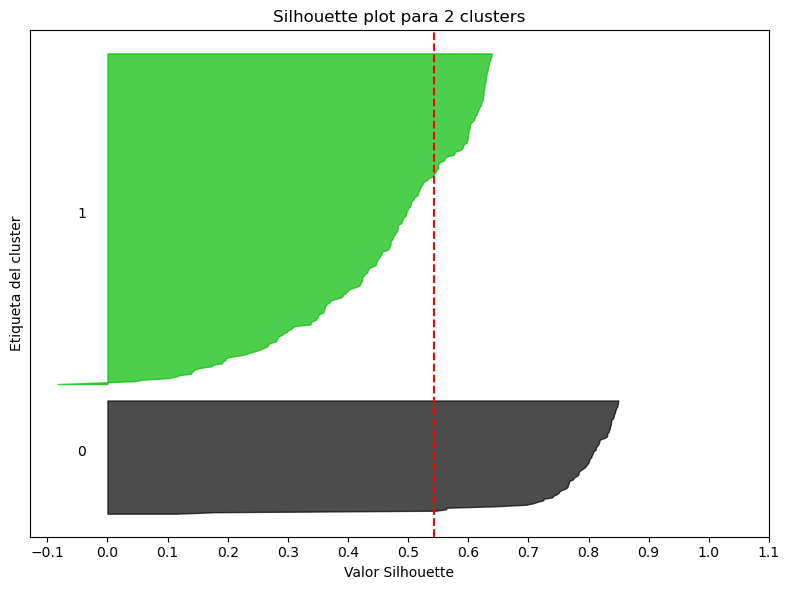

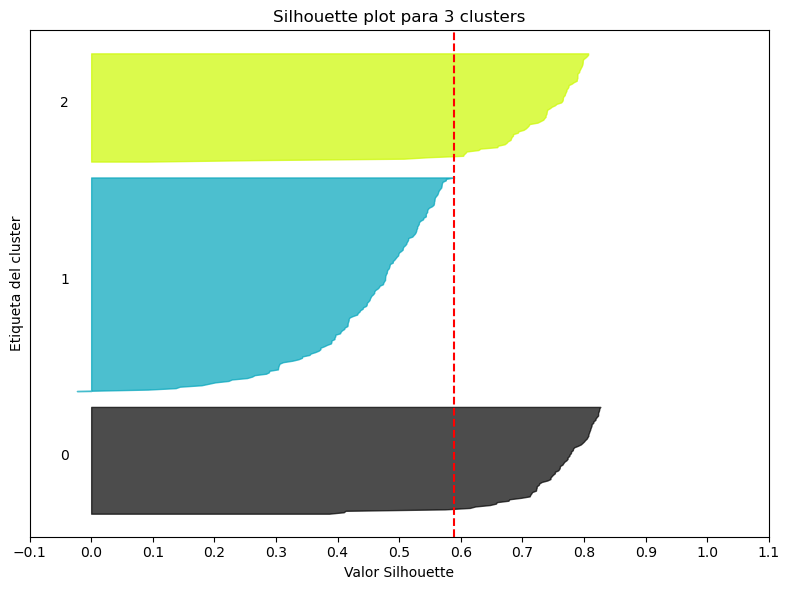

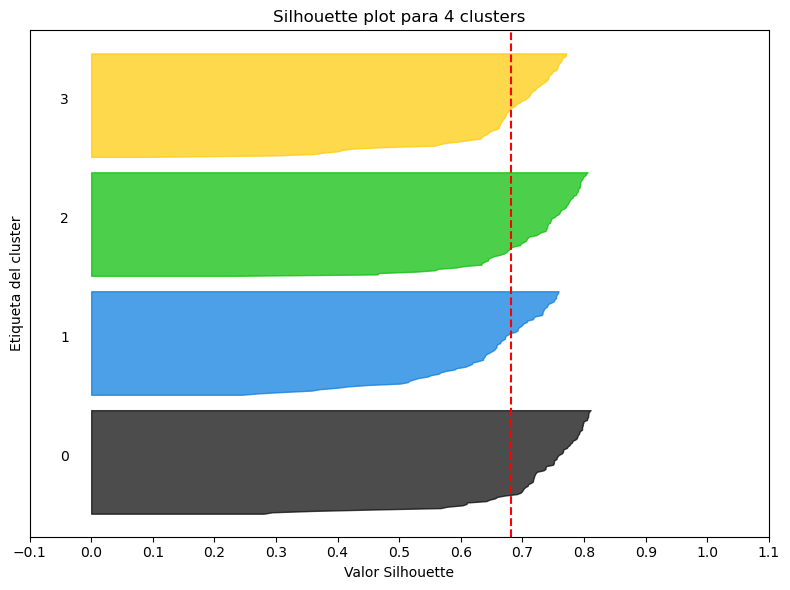

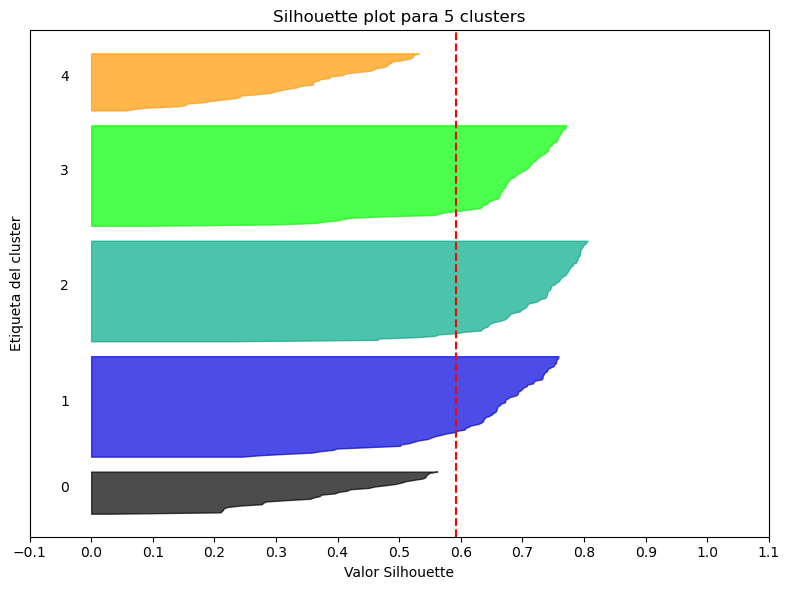

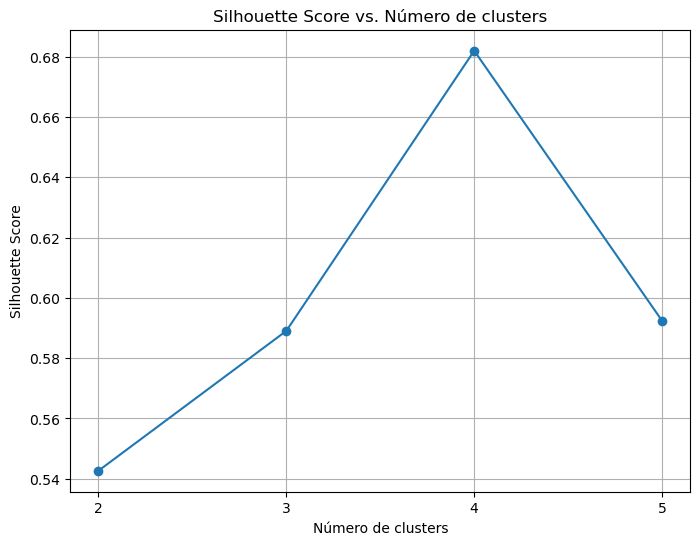

In [16]:
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Lista para almacenar los valores de Silhouette Score
silhouette_scores = []

# Rango de número de clusters a probar
range_n_clusters = [2, 3, 4, 5]

# Calcular el Silhouette Score para diferentes números de clusters
for n_clusters in range_n_clusters:
    # Inicializar y entrenar el modelo de KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # Calcular el Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calcular el valor Silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Crear una subtrama para cada cluster
    plt.figure(figsize=(8, 6))
    plt.title(f"Silhouette plot para {n_clusters} clusters")
    y_lower = 10
    
    for i in range(n_clusters):
        # Agregar valores de Silhouette para cada muestra del cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Color de relleno para cada cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Etiqueta para el cluster en el gráfico
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Actualizar y_lower para el siguiente plot
        y_lower = y_upper + 10
    
    # Etiquetas y línea vertical para el valor promedio de Silhouette
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlabel("Valor Silhouette")
    plt.ylabel("Etiqueta del cluster")
    plt.yticks([])  # Limpiar etiquetas del eje y
    plt.xticks(np.arange(-0.1, 1.1, 0.1))
    plt.tight_layout()

# Gráfico de Silhouette Score vs. Número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Número de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()
